In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

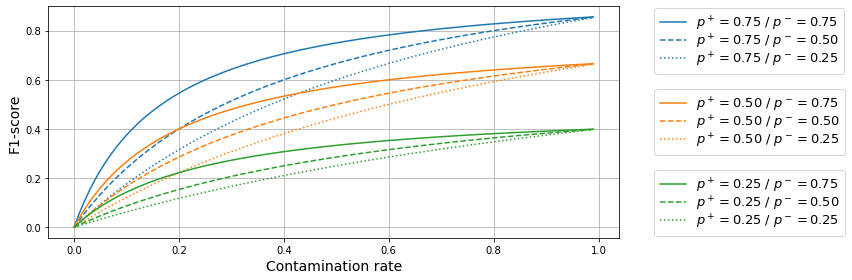

In [107]:
# Produces F1 curves for varying contamination rate (3*3 curves)
plots = {}

plt.figure(figsize=[12,4])
for i_aa, aa in enumerate(np.array(range(3, 0, -1))/4):
    for ac, line_type in zip(np.array(range(3, 0, -1))/4, ["-", "--", ":"]):
        C = 100
        A = C * np.array(range(100)) / (1 - np.array(range(100))/100) / 100
        prec = aa*A / (aa*A + (1-ac)*C)
        rec = aa
        F1 = 2*prec*rec / (prec+rec)
        
        p_plus = f"$p^+=0.{int(aa*100)}$"
        p_minus = f"$p^-=0.{int(ac*100)}$"
                
        if p_plus not in plots:
            plots[p_plus] = []
            label = f"{p_plus} / {p_minus}"
        else:
            label = f"{p_plus} / {p_minus}"
        
        p, = plt.plot(A / (C + A), F1, f"C{i_aa}{line_type}", label=label)        
        plots[p_plus].append(p)
        
plt.xlabel("Contamination rate", fontsize=14)
plt.ylabel('F1-score', fontsize=14)

loc = 1.02
prev_leg = None
for key, values in plots.items():
    if prev_leg is not None:
        plt.gca().add_artist(prev_leg)
    prev_leg = plt.legend(handles=values, bbox_to_anchor=(1.05, loc), loc='upper left', fontsize=13, labelspacing=0)
    loc -= 0.35

plt.grid()
plt.tight_layout()
plt.savefig(f"./results/F1score_over_A.pdf", format="pdf", dpi=512)
plt.show()

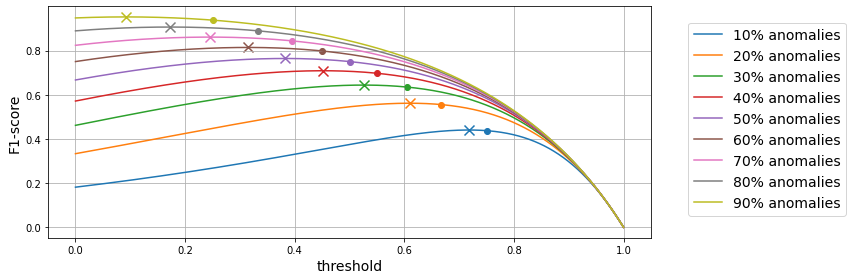

In [96]:
# Produces F1 score curve for a toy example Pa(s) = 2s and pc(s) = 2-2s
prec = 10000
plt.figure(figsize=[12,4])
for i in range(2, 20, 2):
    A = 5*i
    C = 100 - A
    a, b, c = C-A, -2*C, C  # solving FP = FN <=> Ct² - 2Ct + C = At²
    fpfn_threshold = (-math.sqrt(b**2 - 4*a*c) - b) / (2*a) if a != 0 else -c/b
    thresholds = np.arange(prec) / prec
    def f1(t):
        return 2 * A * (1 - t ** 2) / (2 * A * (1 - t ** 2) + C * (t ** 2 - 2 * t + 1) + A * t ** 2)
    F1 = f1(thresholds)
    optimal_threshold = thresholds[np.argmax(F1)]
    line = plt.plot(thresholds, F1, label=f"{A}% anomalies")[0]
    plt.scatter([fpfn_threshold], [f1(fpfn_threshold)], c=line.get_color())
    plt.scatter([optimal_threshold], [f1(optimal_threshold)], marker='x', c=line.get_color(), s=100)

# plt.legend(loc='upper right', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.96), loc='upper left', fontsize=14)
plt.xlabel("threshold", fontsize=14)
plt.ylabel("F1-score", fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig(f"./results/F1score_over_threshold.pdf", format="pdf", dpi=512)
plt.show()